In [1]:
# Step 1: Create the .kaggle directory
!mkdir -p ~/.kaggle

# Step 2: Upload your kaggle.json file
from google.colab import files
files.upload()  # Select the kaggle.json file from your system

# Step 3: Move it to the correct location and set permissions
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# Step 4: Download the dataset from Kaggle
!kaggle datasets download -d salader/dogs-vs-cats
# Step 5: Unzip the dataset
!unzip -q dogs-vs-cats.zip -d dog_cat_dataset

# Step 6: Check files
!ls dog_cat_dataset


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.03G/1.06G [00:08<00:00, 388MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s]
dogs_vs_cats  test  train


In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

# Load training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dog_cat_dataset/train',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Load validation dataset
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dog_cat_dataset/test',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Normalize images (fixing typo in function)
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Fixed typo: 'iamge' and 'labels'
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


# Create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))  # Fixed typo: 'inputy_shape'
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  # For binary classification: dogs vs cats
model.summary()


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,438,209 (28.37 MB)

 Trainable params: 7,437,889 (28.37 MB)

 Non-trainable params: 320 (1.25 KB)

In [3]:


# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_ds, validation_data=validation_ds, epochs=10)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 81ms/step - accuracy: 0.5871 - loss: 1.1078 - val_accuracy: 0.6800 - val_loss: 0.6033
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.7204 - loss: 0.5600 - val_accuracy: 0.7438 - val_loss: 0.5153
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.7753 - loss: 0.4779 - val_accuracy: 0.7296 - val_loss: 0.5582
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8216 - loss: 0.4031 - val_accuracy: 0.7704 - val_loss: 0.5498
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 78ms/step - accuracy: 0.8455 - loss: 0.3504 - val_accuracy: 0.7758 - val_loss: 0.5213
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8833 - loss: 0.2770 - val_accuracy: 0.8146 - val_loss: 0.4935
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9251 - loss: 0.1903 - val_accuracy: 0.7870 - val_loss: 0.6497
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9551 - loss: 0.1284 - 

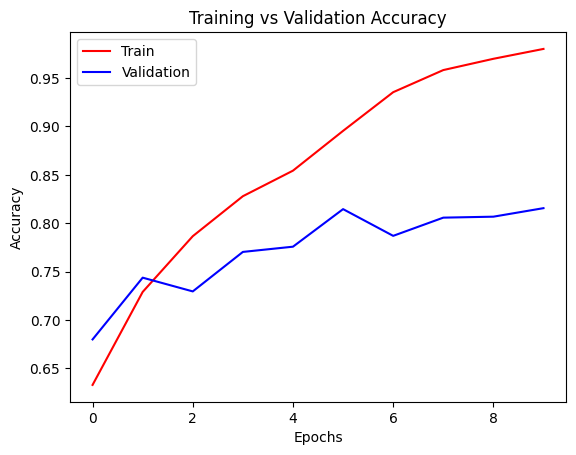

In [6]:
import matplotlib.pyplot as plt  # Correct import

plt.plot(history.history['accuracy'], color='red', label='Train')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


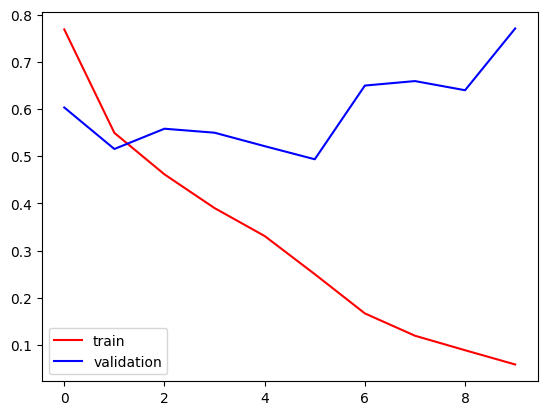

In [7]:
plt.plot(history.history['loss'],color='red', label ='train')
plt.plot(history.history['val_loss'],color='blue', label = 'validation')
plt.legend()
plt.show()

Saving download.jpg to download.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


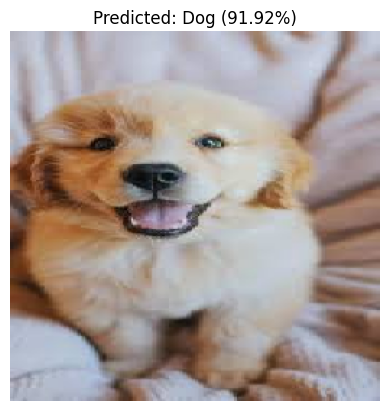

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image

# Upload image
uploaded = files.upload()

for fn in uploaded.keys():
    # Load and preprocess image
    img_path = fn
    img = image.load_img(img_path, target_size=(256, 256))  # Same size as training images
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)

    # Show result
    plt.imshow(img)
    plt.axis('off')
    predicted_class = 'Dog' if prediction[0][0] > 0.5 else 'Cat'
    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]
    plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()
